The purpose of this notebook is to see how data from Volvo looks like

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from copy import deepcopy
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [7]:
pickles = {}
for set_num in ['369', '370', '371', '372', '375']:
    pickles['data-'+set_num] = np.load('../data/mixed/volvo-buses/data-'+ set_num +'.pickle',  allow_pickle=True)
    print(set_num, ' loaded')
    
    # break point for not loading all data at once (unefficient) 
    break

369  loaded


In [8]:
data = pickles['data-369']
data

,Timestamp,WetTankAirPressure,LongitudAcc,EngineSpeed,Fuel Rate,Engine Load,Boost Pressure,EngineAirInletPressure,AcceleratorPedalPos,VehicleSpeed,BrakePedalPos
0,2.627645e+10,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
1,2.627645e+10,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
2,2.627645e+10,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
3,2.627645e+10,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
4,2.627645e+10,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10908295,8.299465e+10,11.65255,-0.2,596.500,4.081143,24.0,0.008618,102.0,0.0,2.331882,0.0
10908296,8.299465e+10,11.58360,-0.4,616.750,3.430526,19.5,0.000000,102.0,0.0,1.796760,11.2
10908297,8.299465e+10,11.51465,0.0,573.000,3.726261,20.5,0.000000,102.0,0.0,0.000000,18.4
10908298,8.299465e+10,11.44570,0.0,617.500,3.726261,20.0,0.000000,102.0,0.0,0.000000,0.0


In [4]:
# print(type(data))
# import pandas_profiling
# profile = data.profile_report()
# profile.to_file("report.html")

<class 'pandas.core.frame.DataFrame'>


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Admin\anaconda3\envs\tensor\lib\site-packages\multimethod\__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
c:\Users\Admin\anaconda3\envs\tensor\lib\site-packages\multimethod\__init__.py:312: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
c:\Users\Admin\anaconda3\envs\tensor\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
VACT_EPOCH = datetime.datetime(year=2011,month=6,day=16,hour=5,minute=23,second=0)
def getDate(value):
    return VACT_EPOCH + datetime.timedelta(milliseconds=int(value))

data.Timestamp = data.Timestamp.apply(getDate)
data.Timestamp

0          2012-04-15 08:23:47.763
1          2012-04-15 08:23:48.457
2          2012-04-15 08:23:49.550
3          2012-04-15 08:23:50.715
4          2012-04-15 08:23:51.435
                     ...          
10908295   2014-01-31 19:27:06.824
10908296   2014-01-31 19:27:07.994
10908297   2014-01-31 19:27:08.672
10908298   2014-01-31 19:27:09.790
10908299   2014-01-31 19:27:10.884
Name: Timestamp, Length: 10908300, dtype: datetime64[ns]

Service: 02/07/2012 for 369. 370 seems normal(?). For 371 this period seems weird, but I'm not sure about anomaly. 372, 375 - this period is not in time range of this bus. 

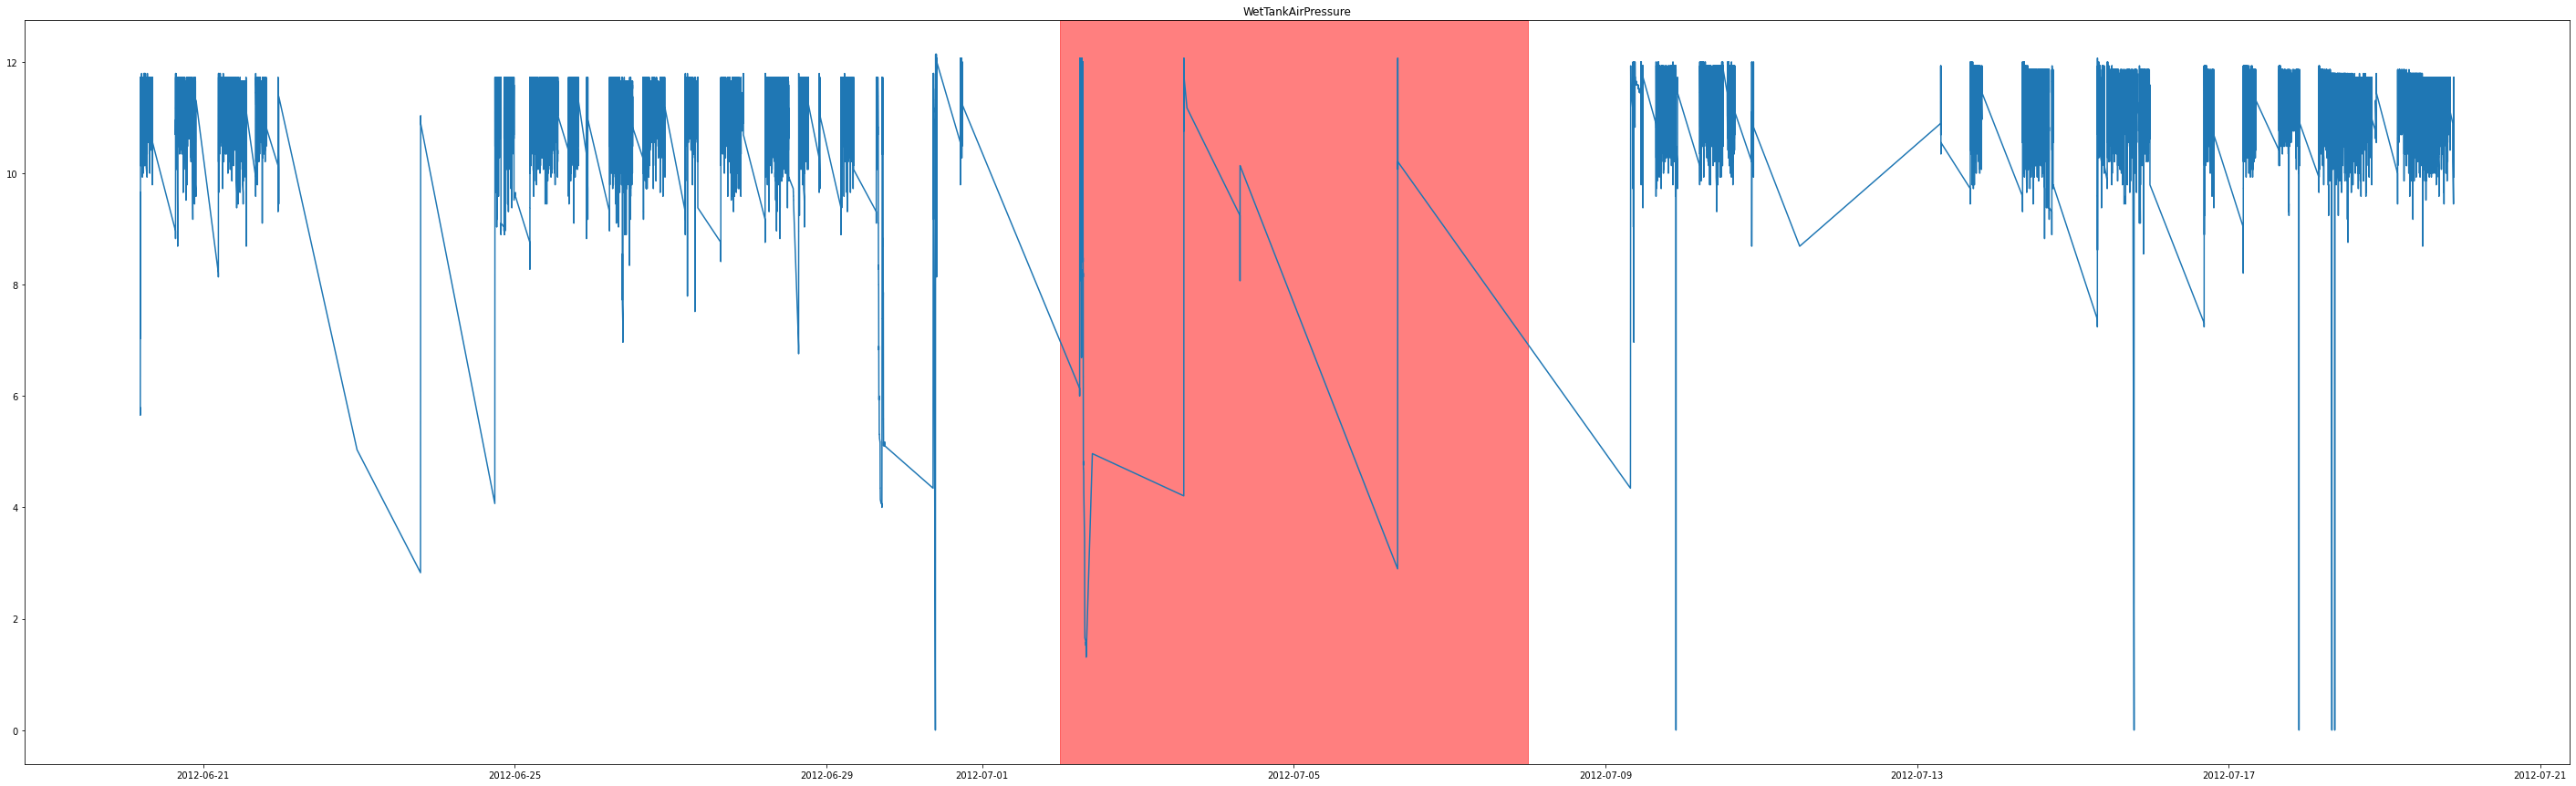

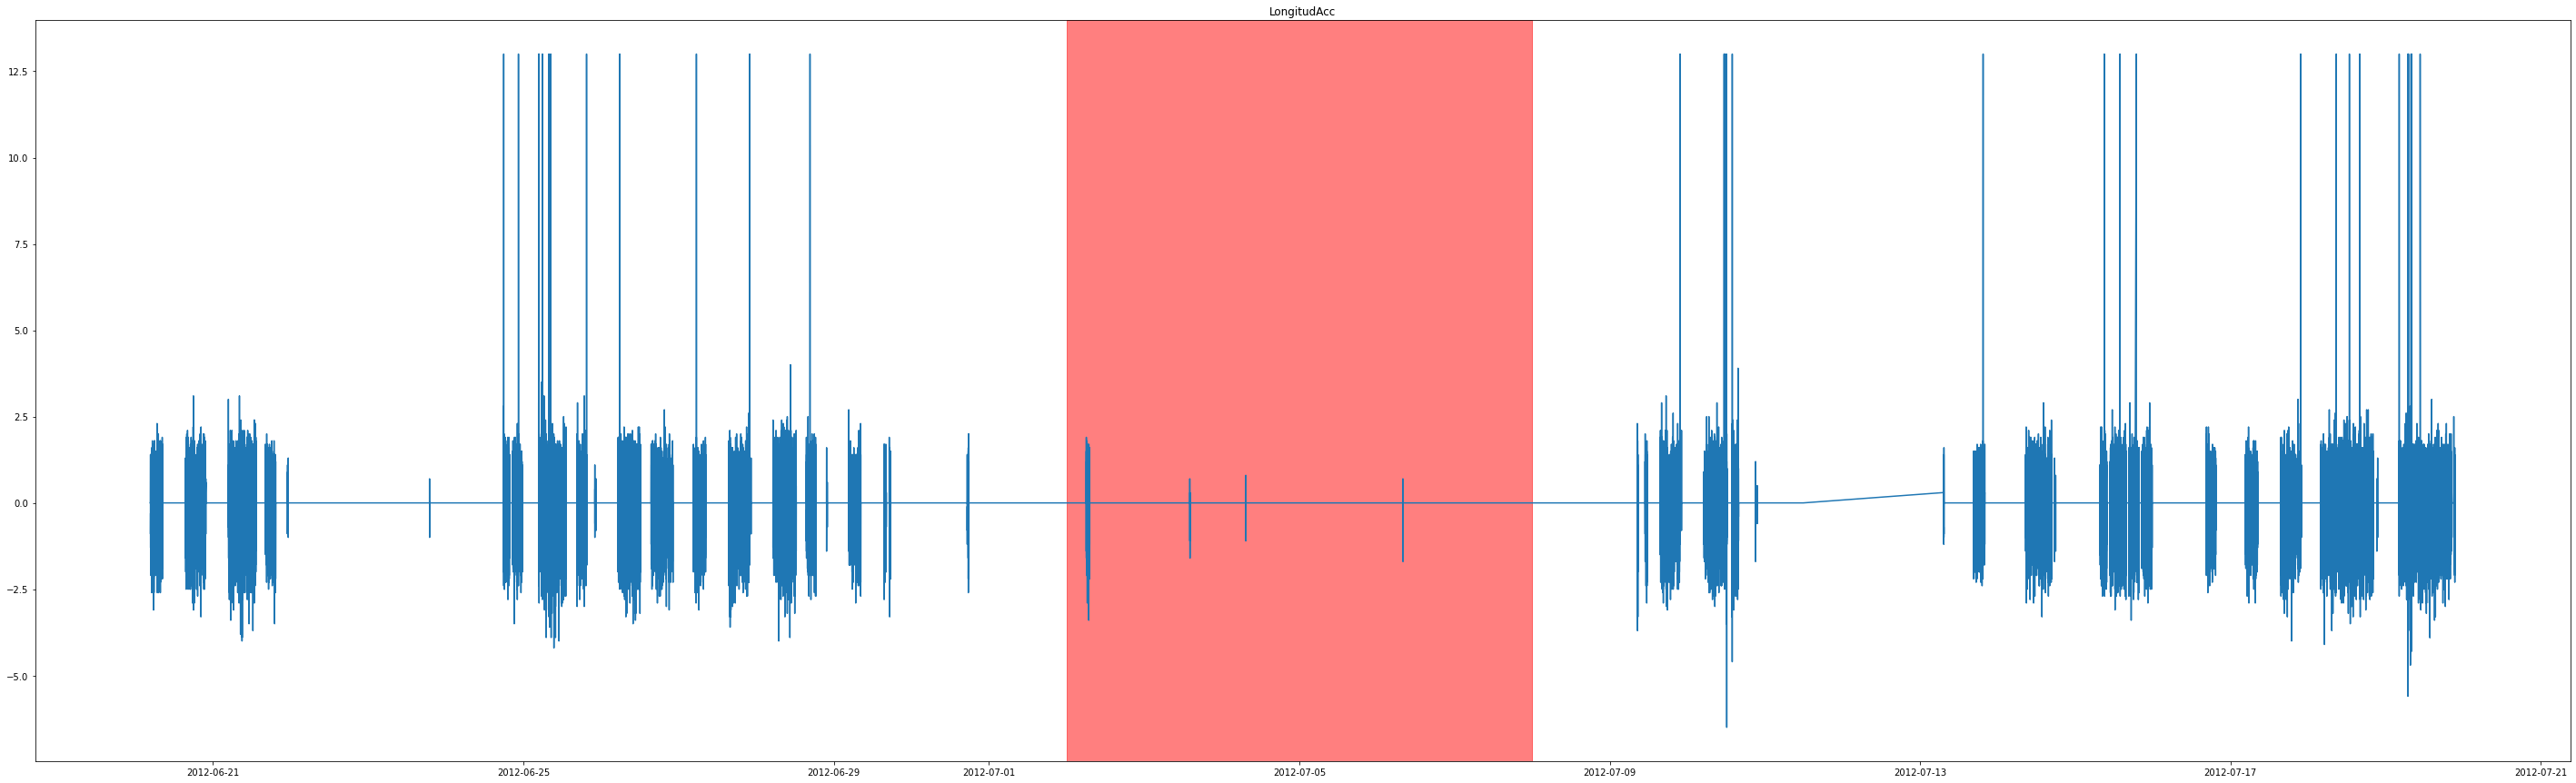

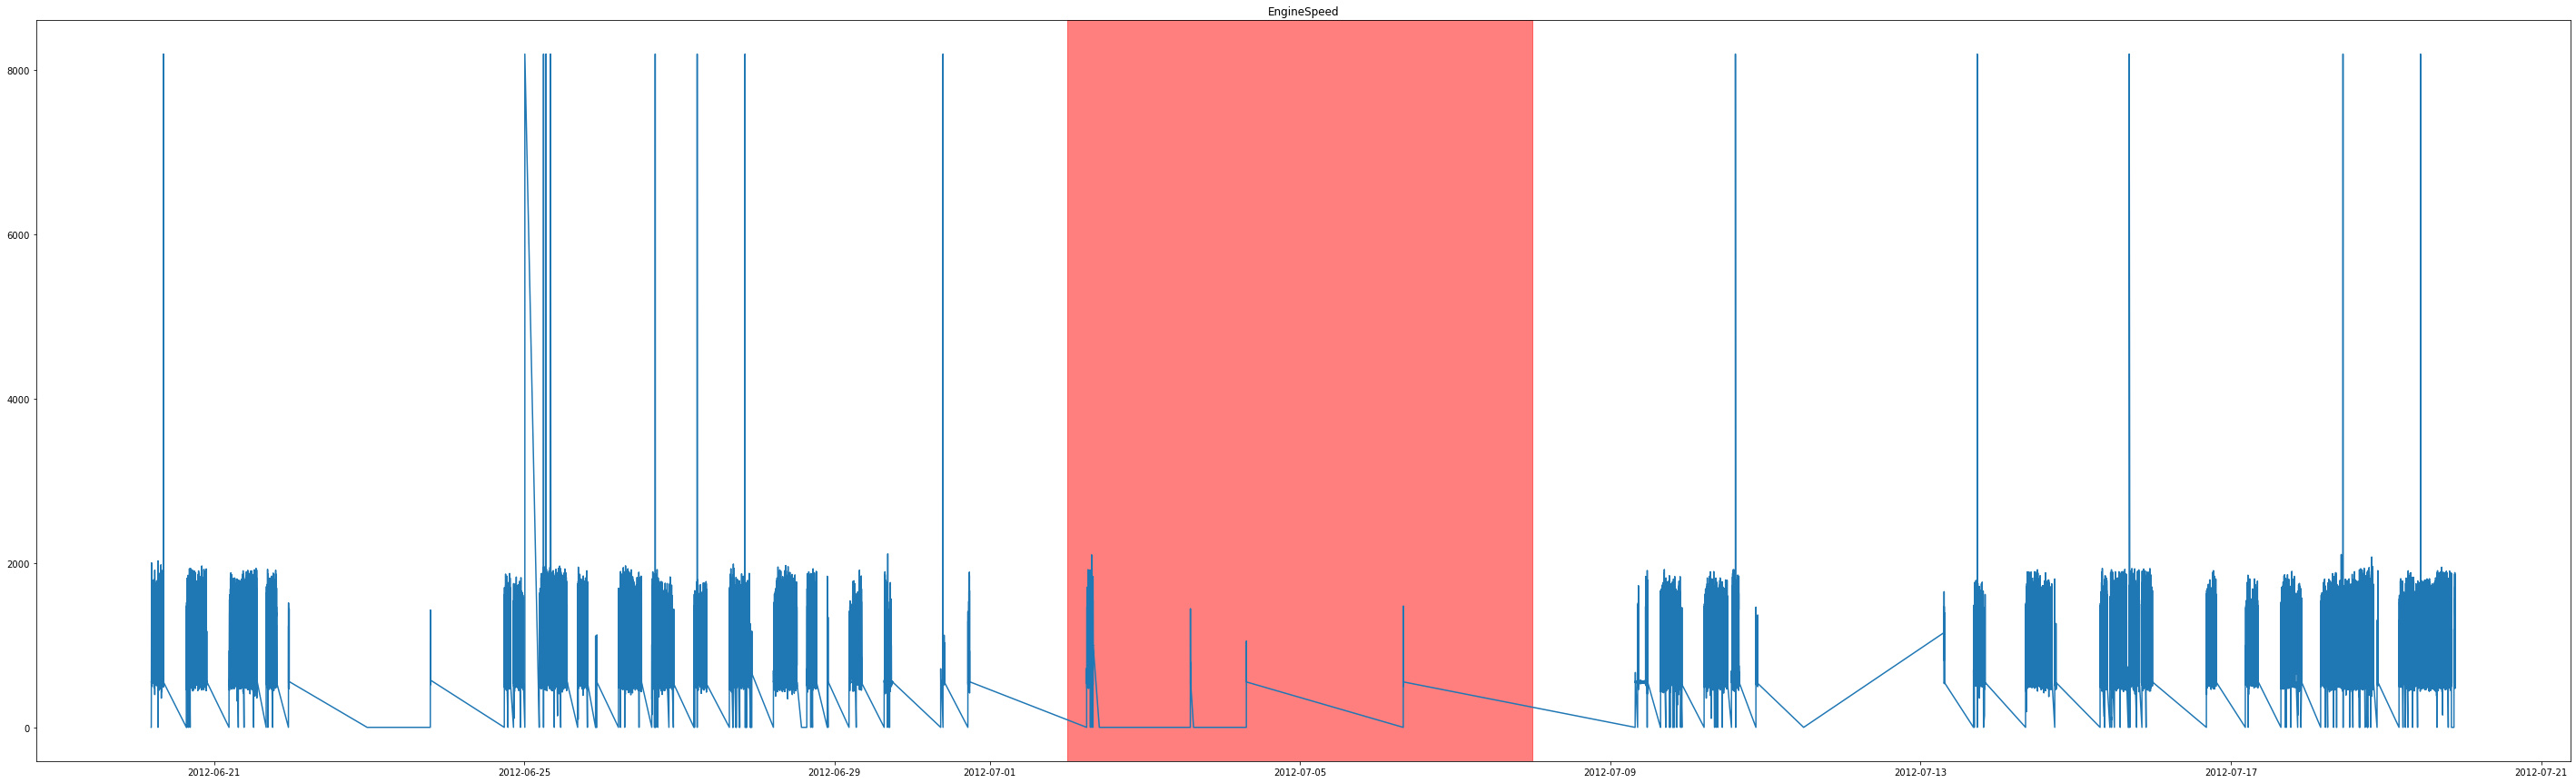

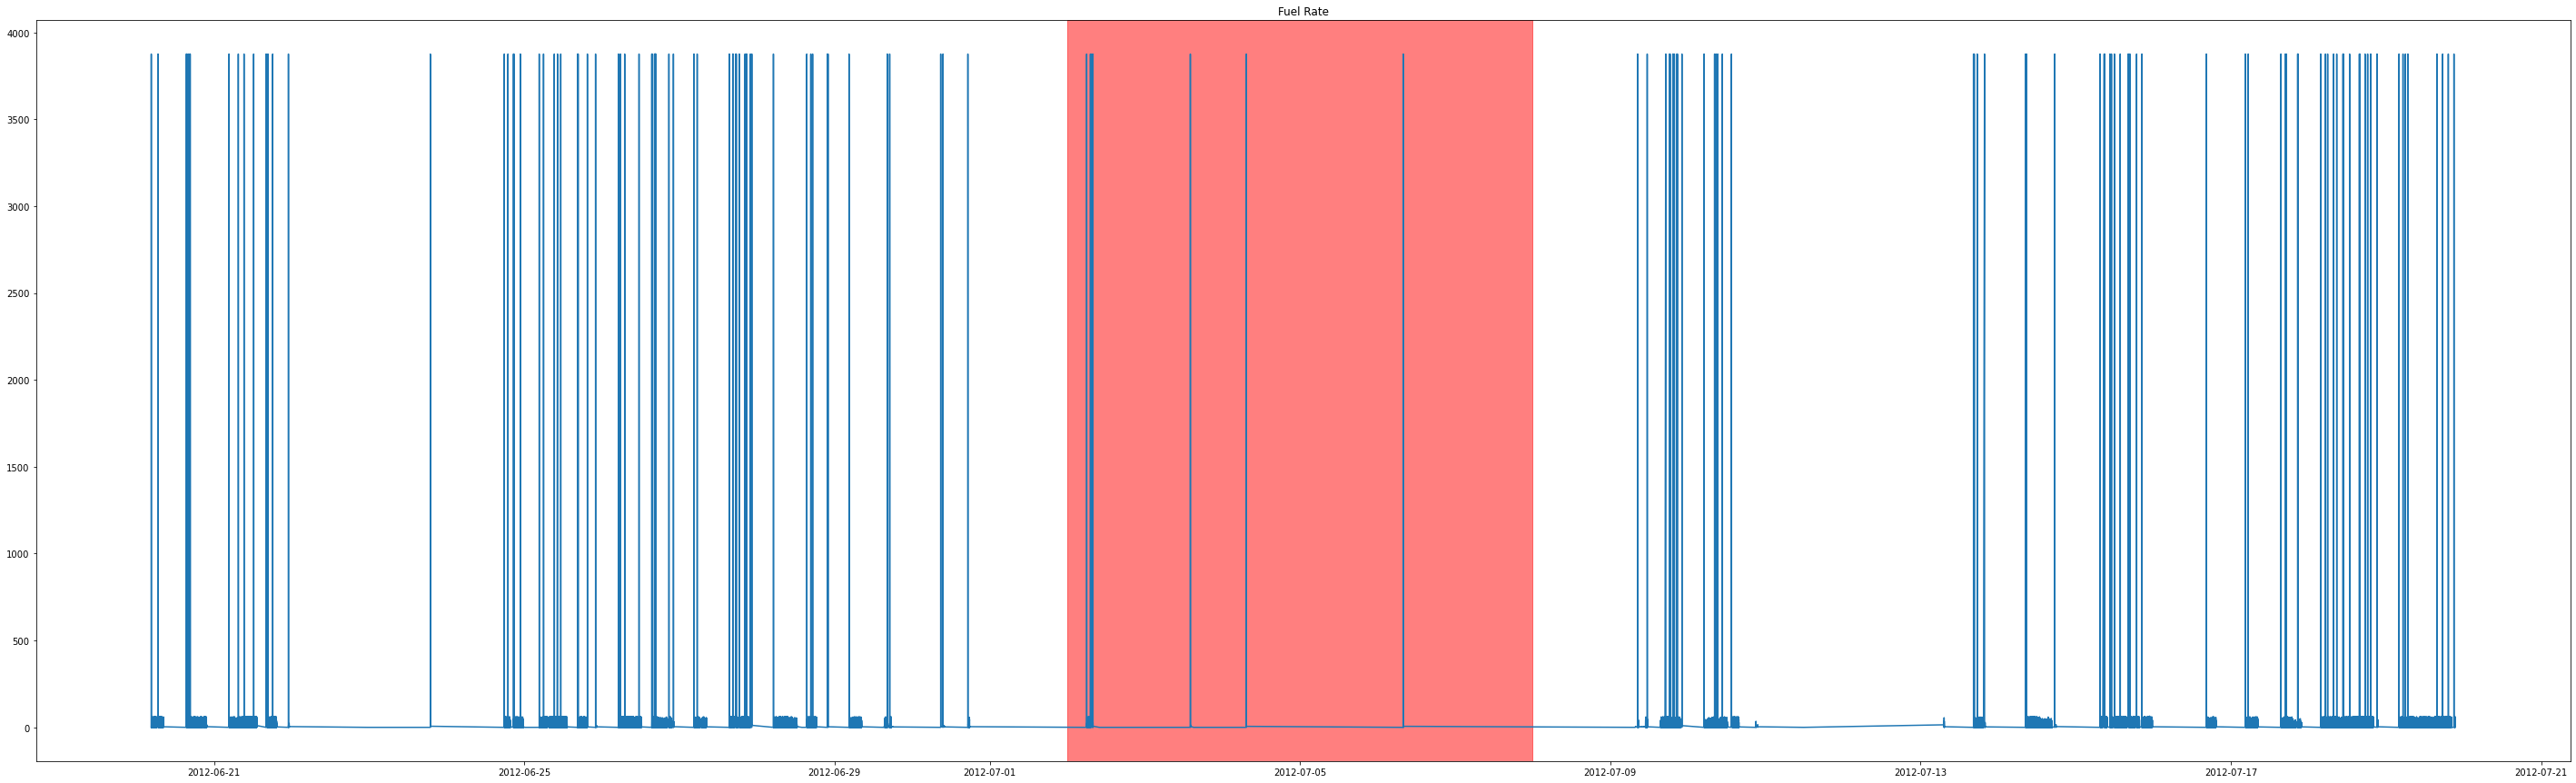

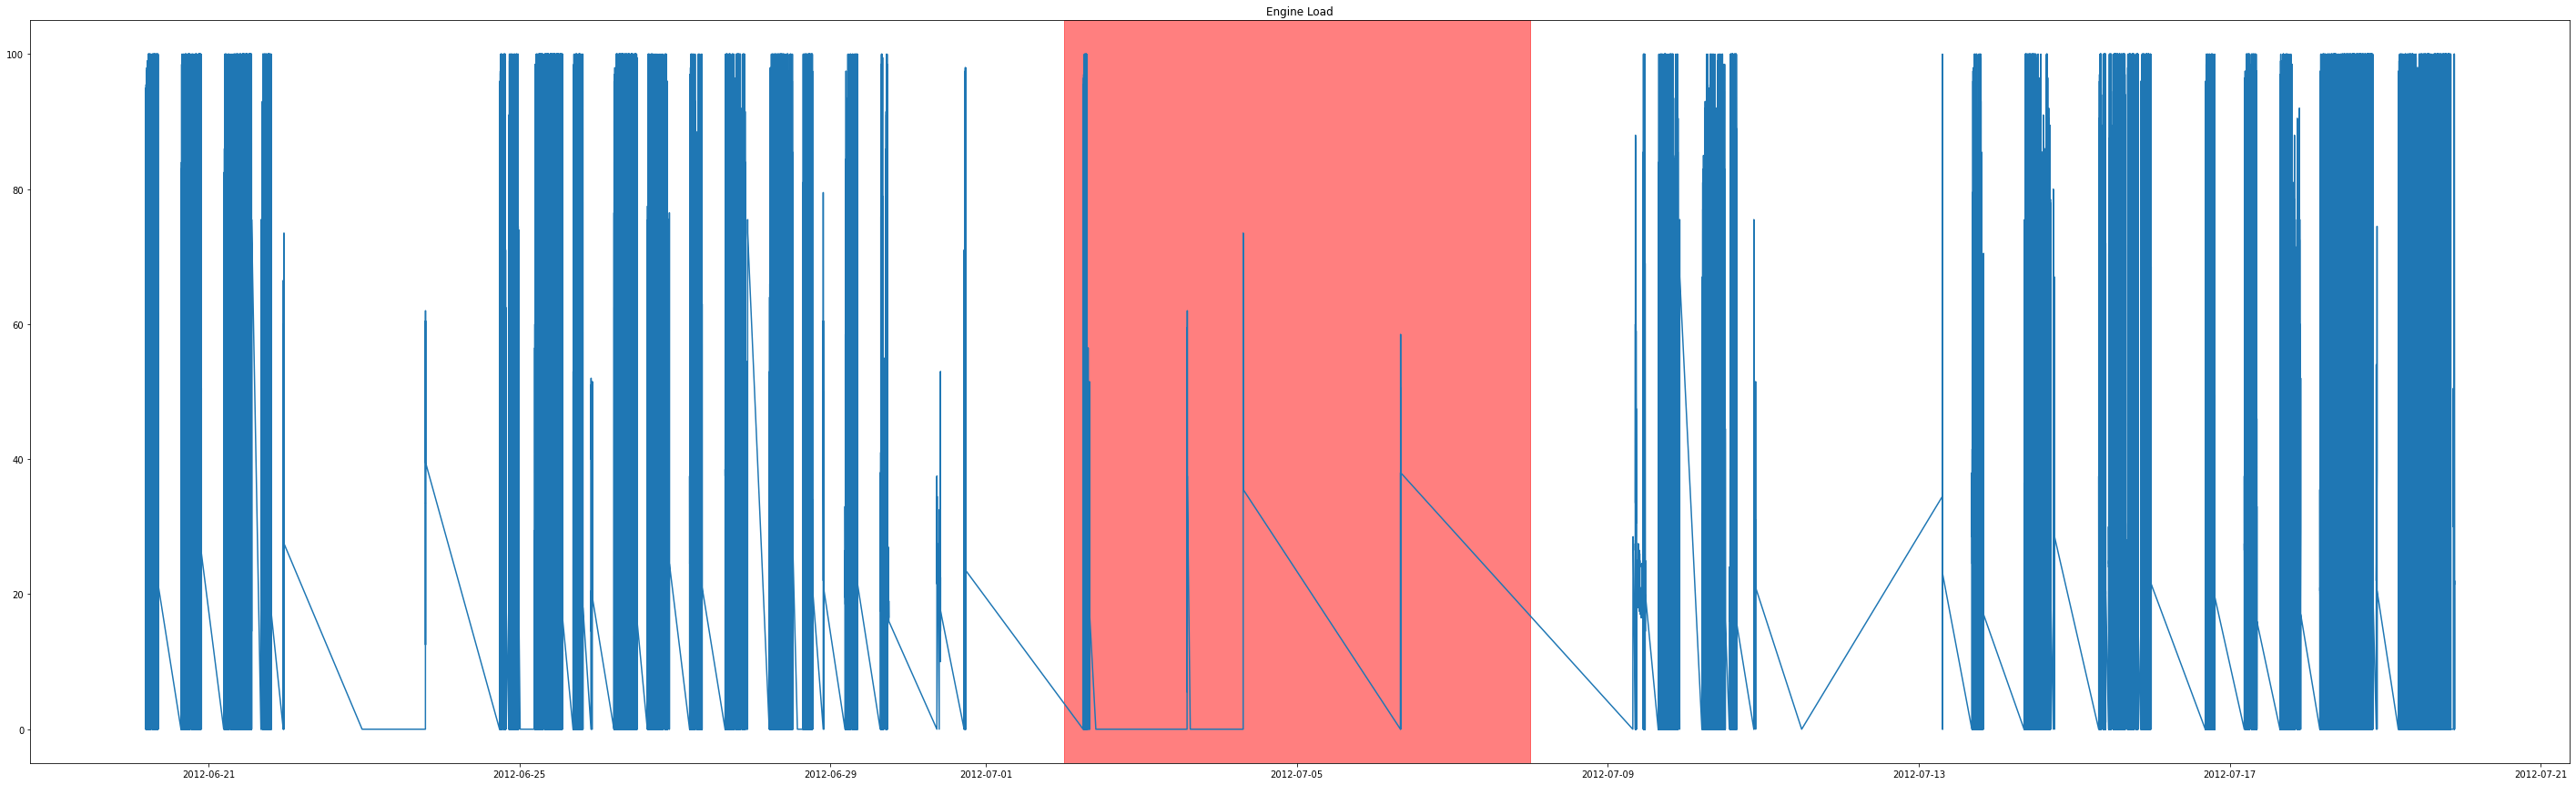

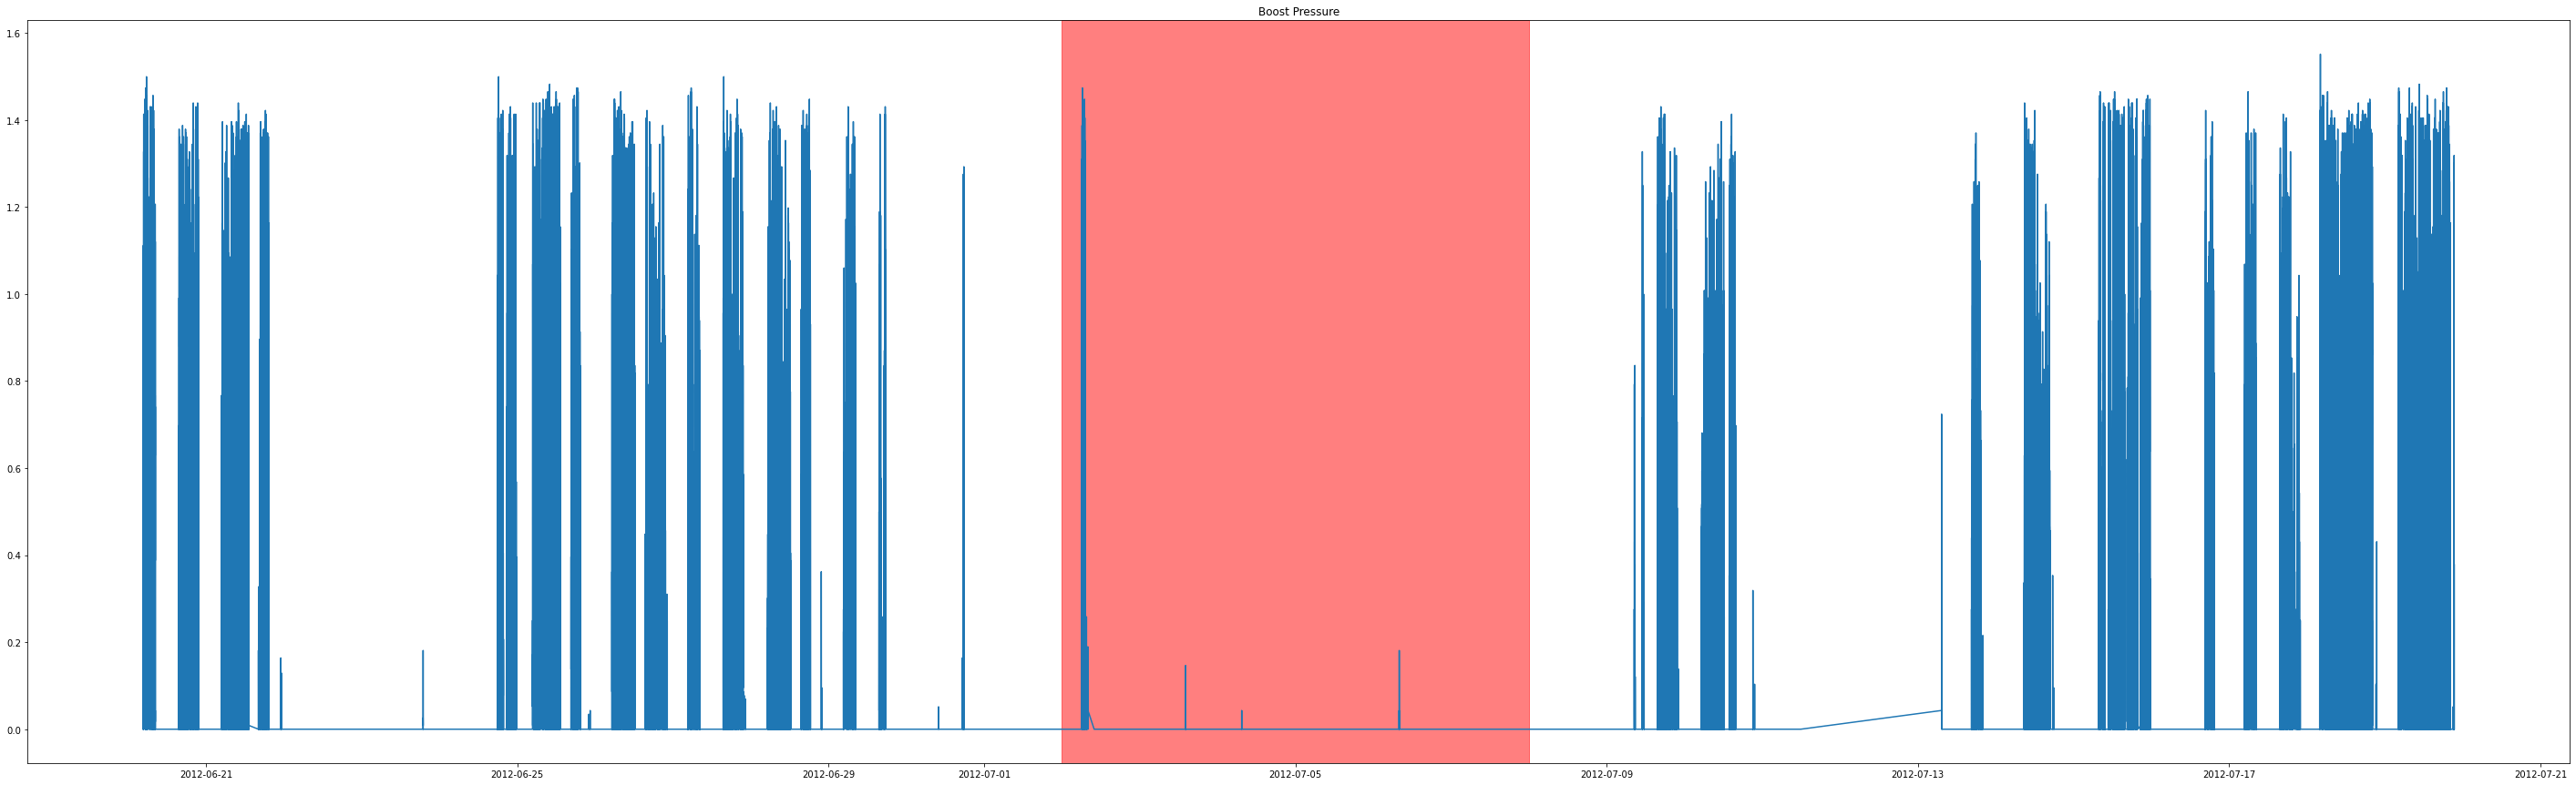

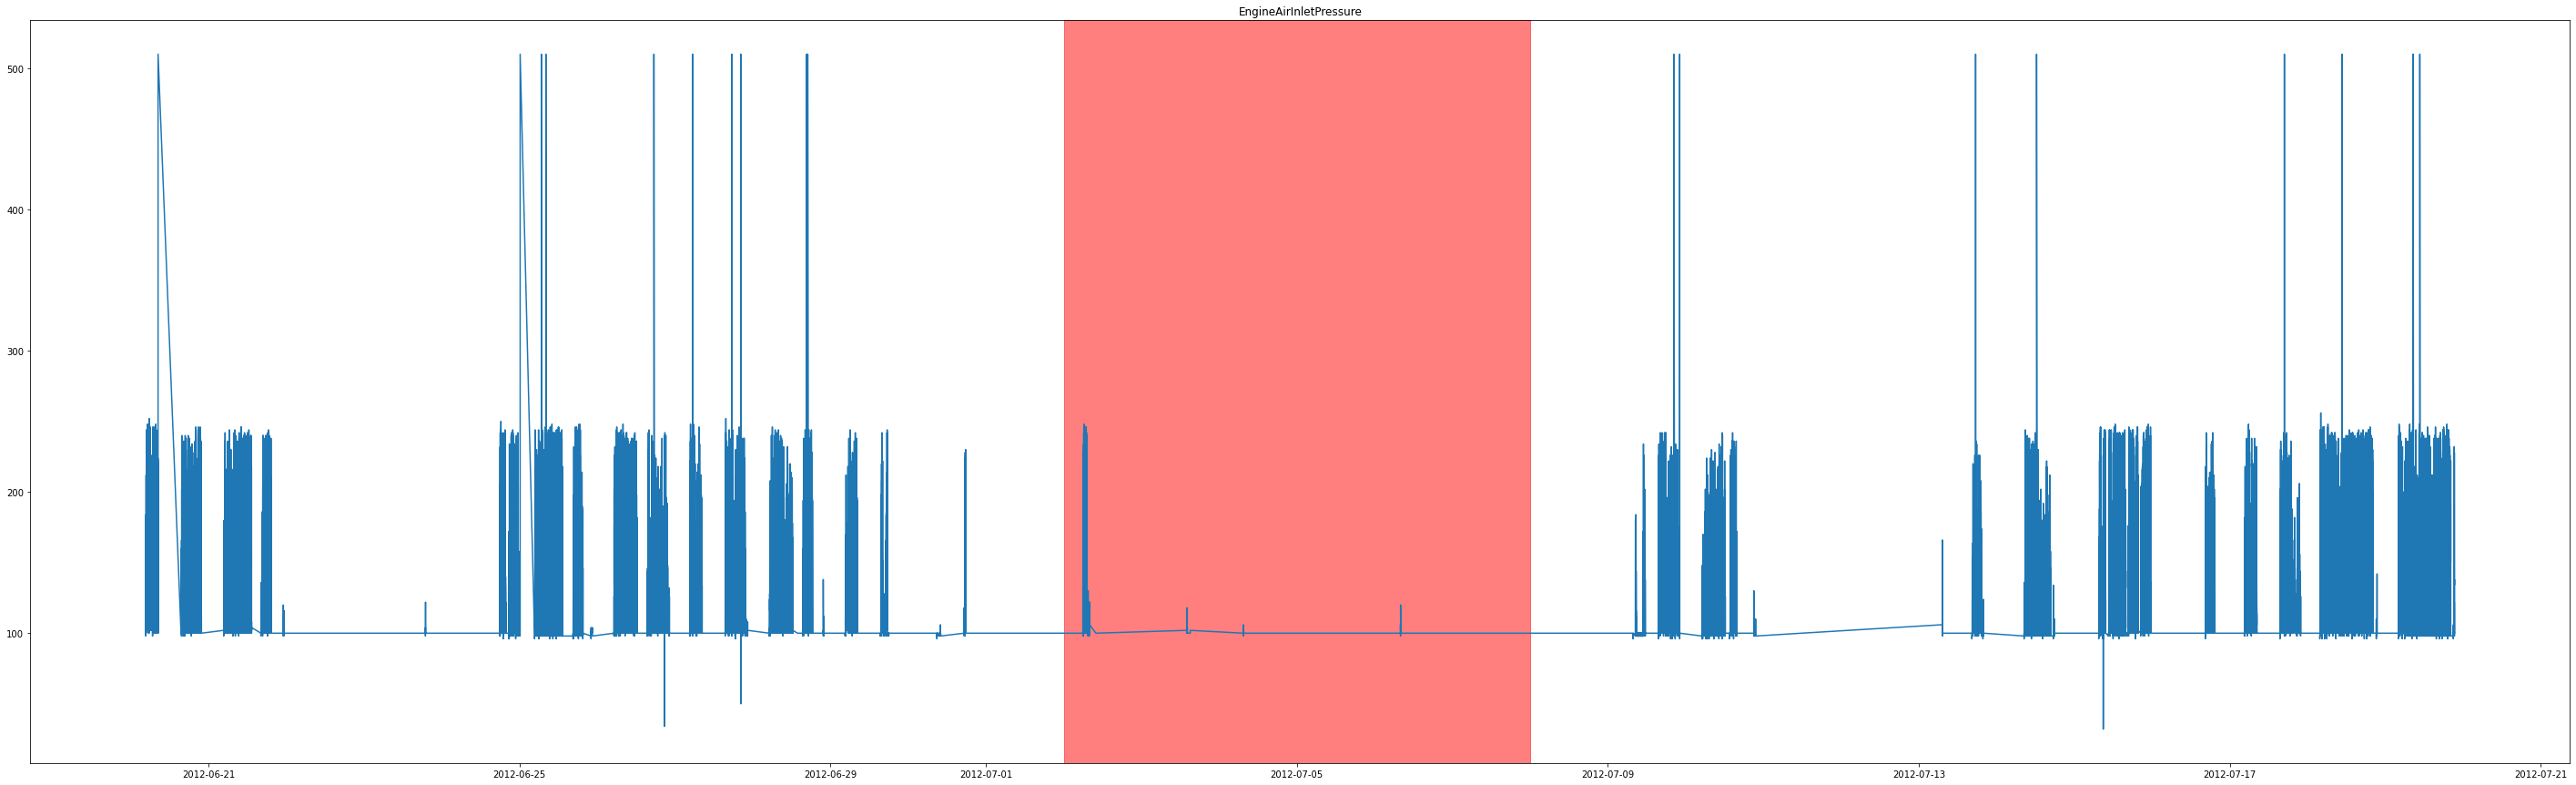

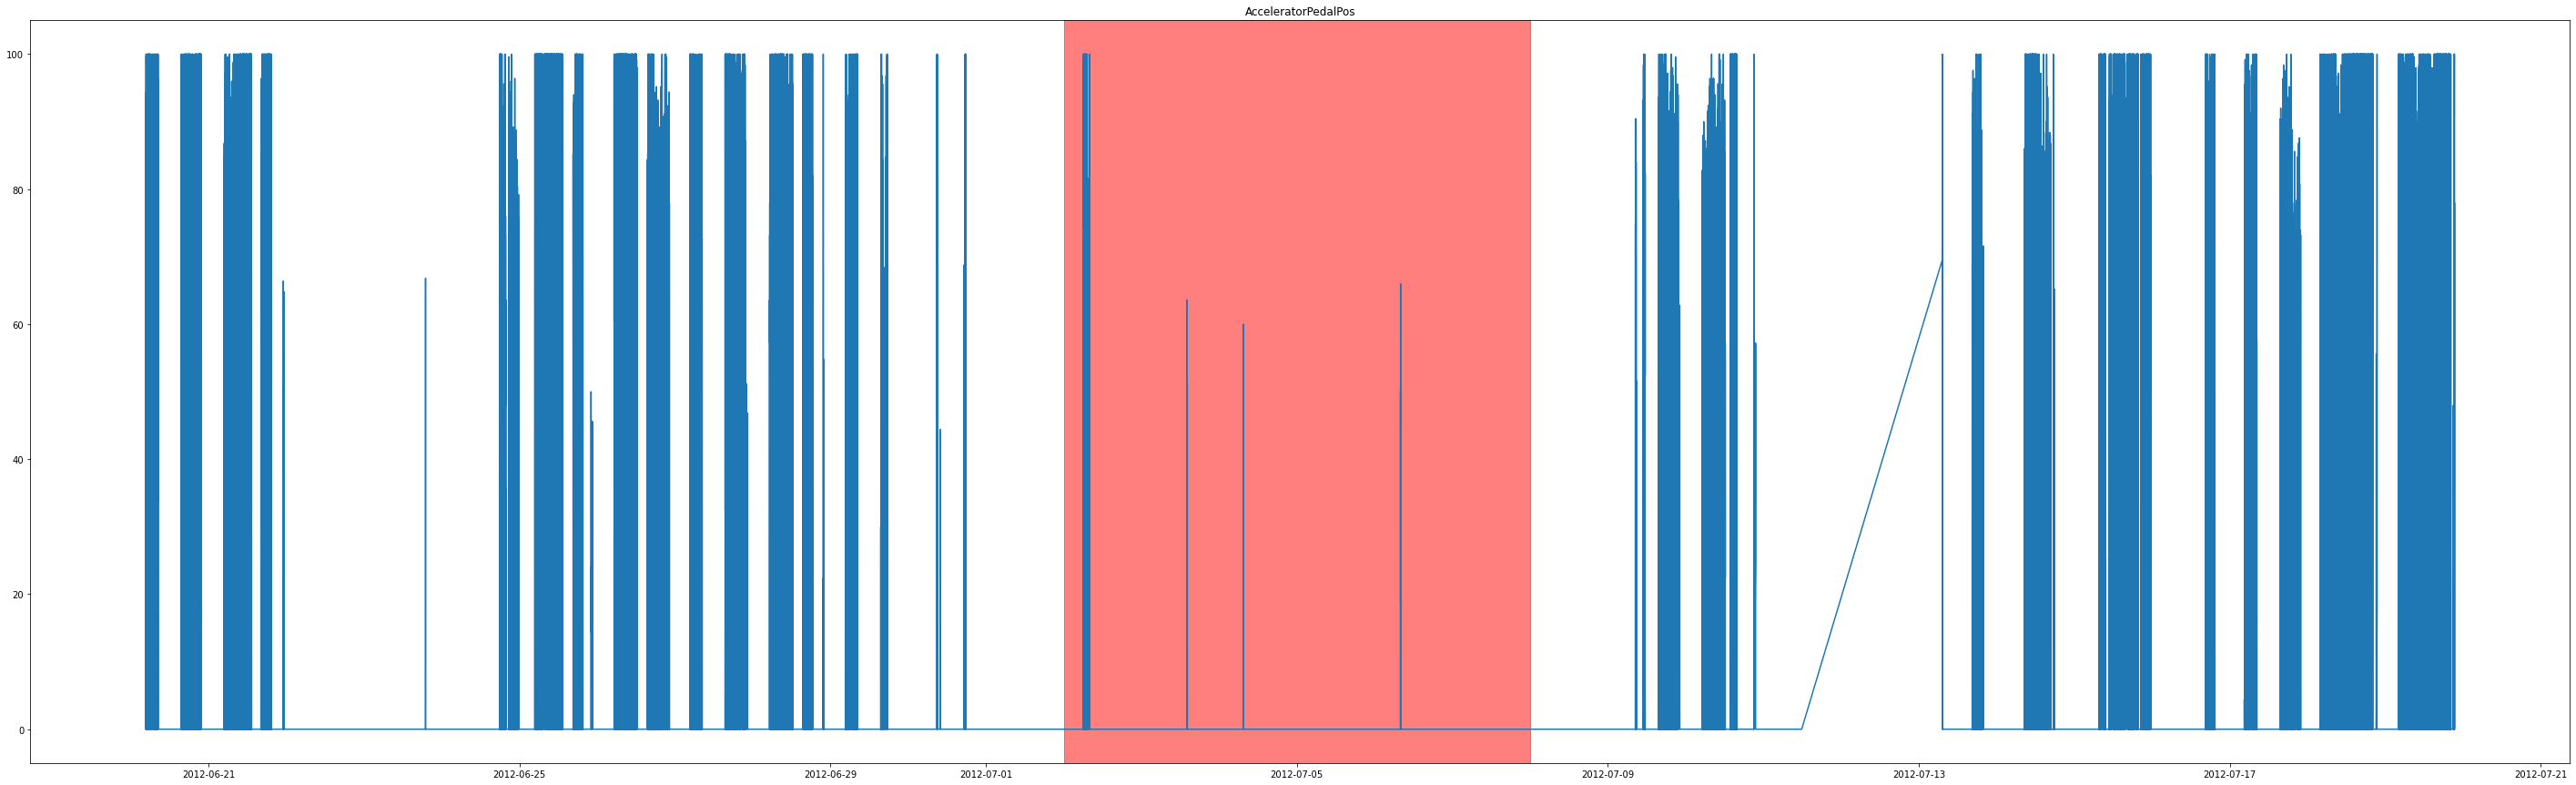

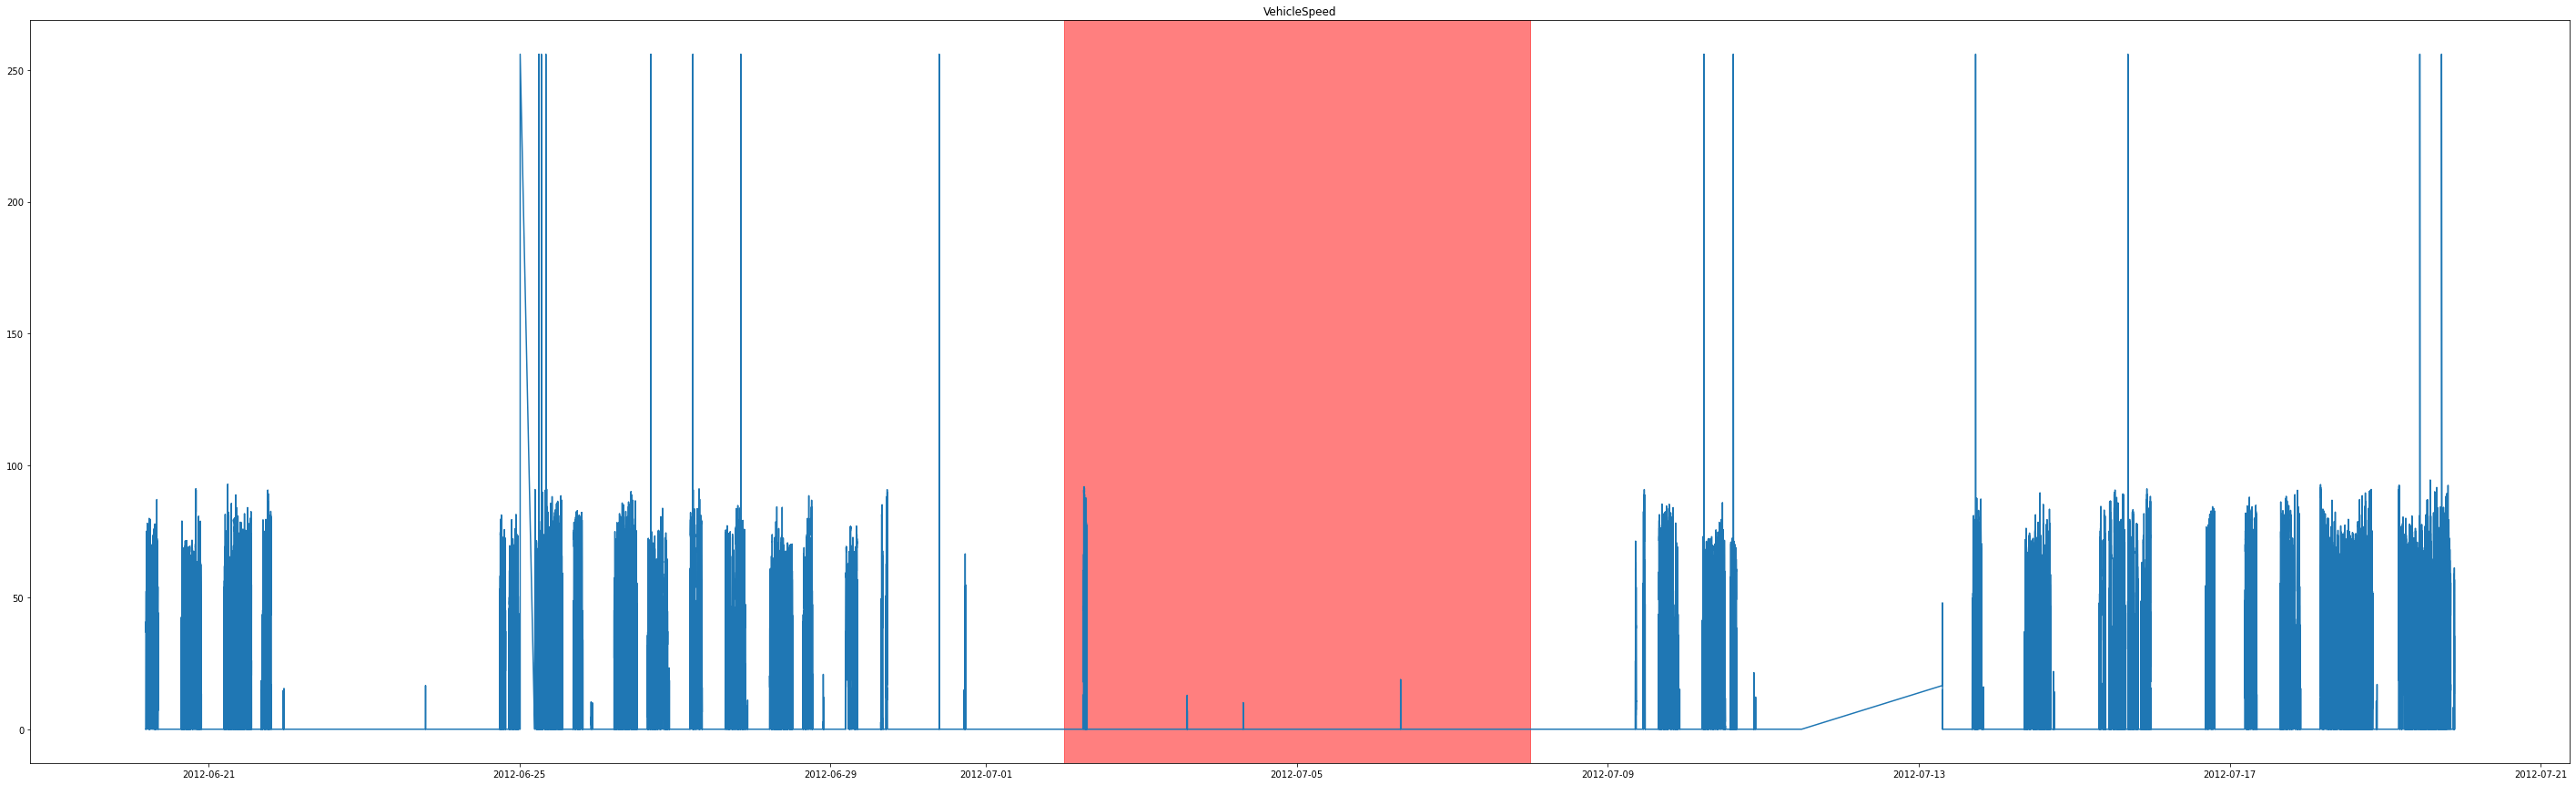

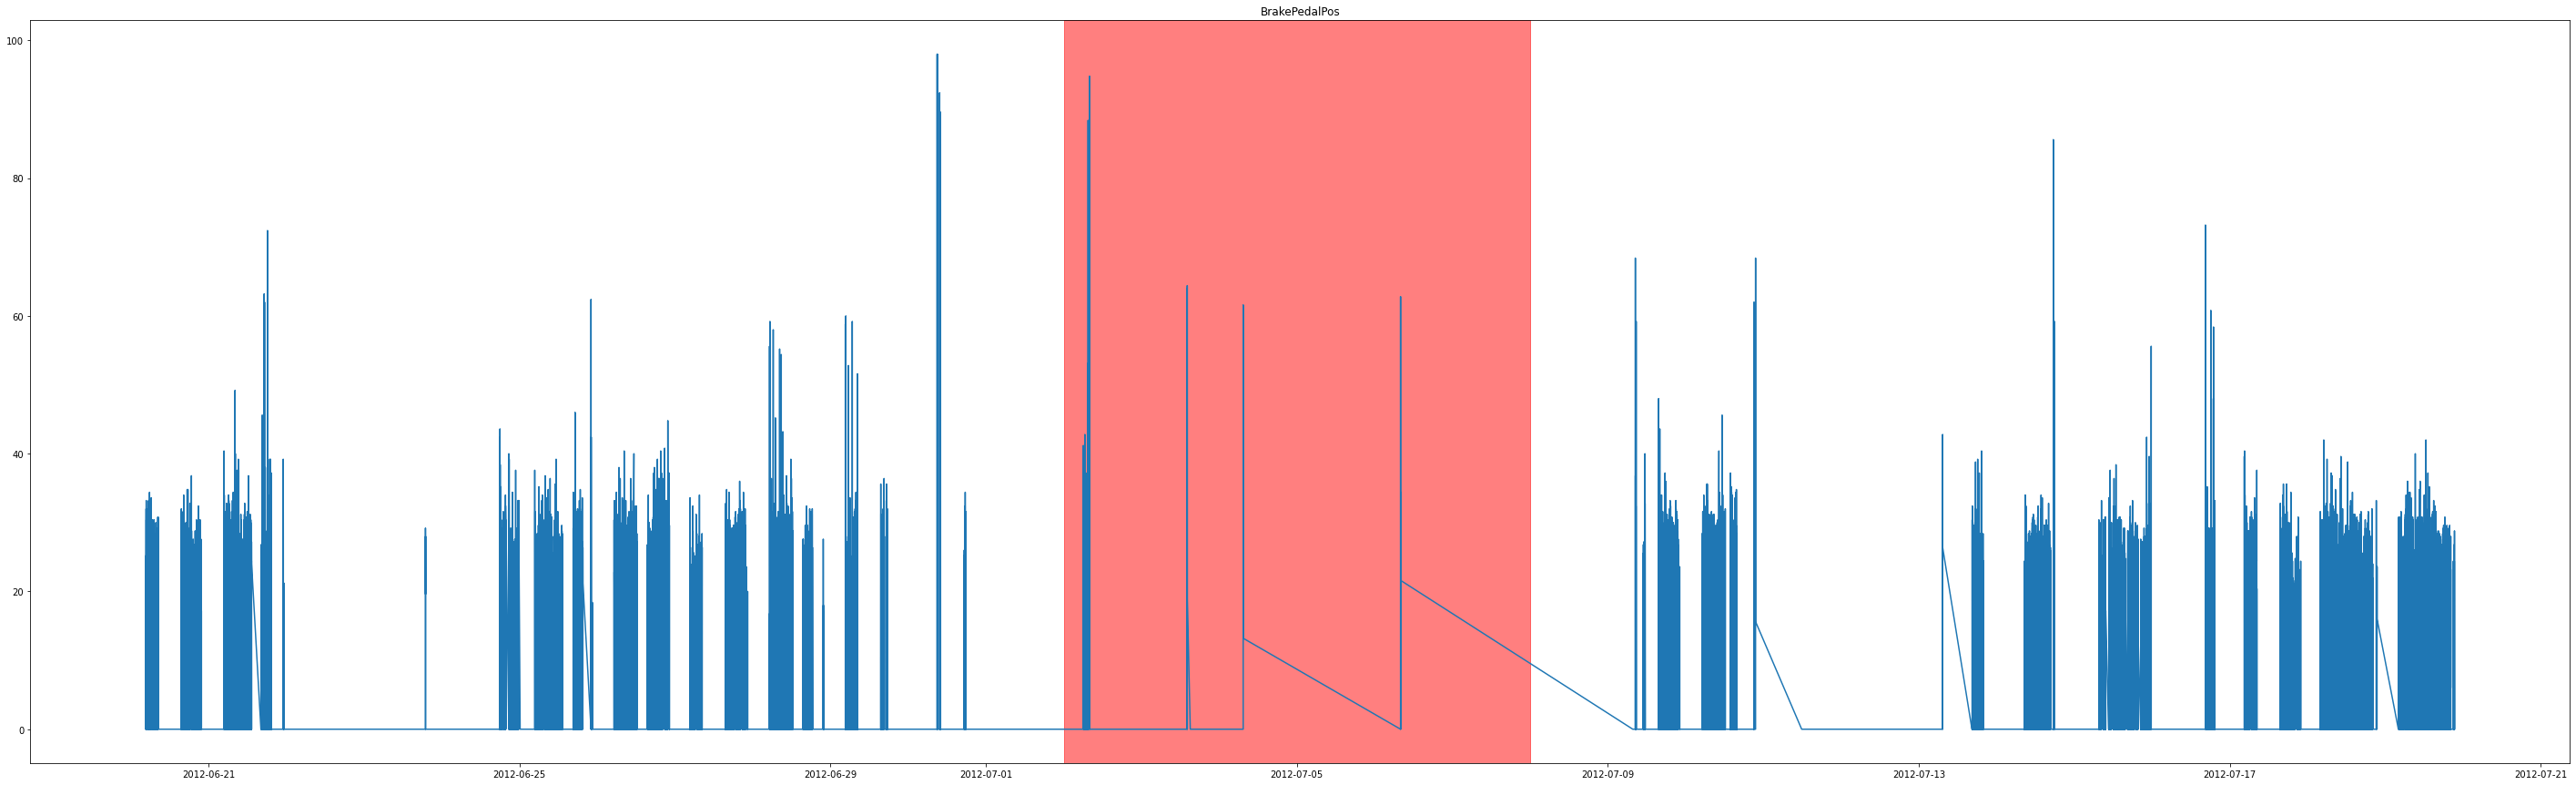

In [6]:
for col in data.columns:
    if col == 'Timestamp':
        continue
    else:
        partial_data = data.loc[(data['Timestamp'] >= datetime.datetime(year=2012,month=6,day=20,hour=0,minute=0,second=1))
              & (data['Timestamp'] <= datetime.datetime(year=2012,month=7,day=20,hour=0,minute=0,second=1))]

        f = plt.figure(figsize=(50, 15))
        plt.plot(partial_data['Timestamp'], partial_data[col])
        plt.title(col)
        plt.axvspan(datetime.datetime(year=2012,month=7,day=2,hour=0,minute=0,second=1), datetime.datetime(year=2012,month=7,day=8,hour=0,minute=0,second=1), color='red', alpha=0.5)
        plt.show()


Just for the sake of comparison:

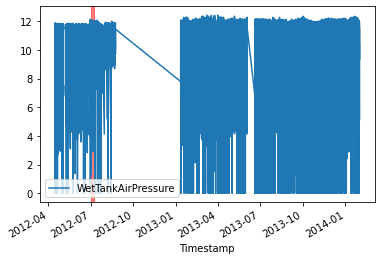

In [7]:
data.plot('Timestamp', 'WetTankAirPressure')
plt.axvspan(datetime.datetime(year=2012,month=7,day=2,hour=0,minute=0,second=1), datetime.datetime(year=2012,month=7,day=8,hour=0,minute=0,second=1), color='red', alpha=0.5)
plt.show()

Experiments

Spliting data to train / test

In [42]:
data_train = data.loc[(data['Timestamp'] >= datetime.datetime(year=2012,month=5,day=20,hour=0,minute=0,second=1))
              & (data['Timestamp'] <= datetime.datetime(year=2012,month=7,day=20,hour=0,minute=0,second=1))]

X_train = data_train['WetTankAirPressure']
y_train = np.zeros(X_train.shape)

y_train[(data_train['Timestamp'] >= datetime.datetime(year=2012,month=6,day=20,hour=0,minute=0,second=1))
              & (data_train['Timestamp'] <= datetime.datetime(year=2012,month=7,day=20,hour=0,minute=0,second=1))] = 1

X_test = data.loc[(data['Timestamp'] >= datetime.datetime(year=2012,month=7,day=25,hour=0,minute=0,second=1))
              & (data['Timestamp'] <= datetime.datetime(year=2013,month=12,day=20,hour=0,minute=0,second=1))]
y_test = np.zeros(X_test.shape)

data_dir = {'X_train':X_train, 'y_train':y_train, 'X_test':X_test, 'y_test':y_test}

In [44]:
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '..')

from sklearn.metrics import roc_auc_score

from tqdm import tqdm
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score
from notebooks.utils import *

ModuleNotFoundError: No module named 'pyod'

In [3]:
SEED = 23

In [4]:
clfs_names = ['ECOD', 'LOF', 'IForest', 'HBOS']
nan_datasets = []
results = {x: {} for x in clfs_names}

In [43]:
from tqdm.contrib.concurrent import process_map

datasets_loop = tqdm(data_dir, desc="Datasets (outer loop)", position=0)
algorithms_loop = tqdm(clfs_names, desc=" Algorithms (inner loop)", position=1, leave=False)

Datasets (outer loop):   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
for data in datasets_loop:
    datasets_loop.set_description(data['name'])
    for clf_name in algorithms_loop:
        algorithms_loop.set_description(clf_name)
        clf = new_clf(clf_name, SEED)
        timer.start()
        clf.fit(data['X_train'])
        timer.stop()
        
        # get the prediction labels and outlier scores of the training data
        y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
        y_train_scores = clf.decision_scores_  # raw outlier scores

        # get the prediction on the test data
        y_test_pred = clf.predict(data['X_test'])  # outlier labels (0 or 1)
        y_test_scores = clf.decision_function(data['X_test'])  # outlier scores

        
        if np.isnan(y_train_scores).any() or np.isnan(y_train_pred).any():
            nan_datasets.append(data['name'])
            results[clf_name][data['name']] = (np.nan, np.nan, np.nan, np.nan, np.nan) # AUC/ROC, Rank@N for train,test ; fit Time
            continue
        
        roc_train=np.round(roc_auc_score(data['y_train'], y_train_scores), decimals=4)
        prn_train=np.round(precision_n_scores(data['y_train'], y_train_scores), decimals=4)
        roc_test=np.round(roc_auc_score(data['y_test'], y_test_scores), decimals=4)
        prn_test=np.round(precision_n_scores(data['y_test'], y_test_scores), decimals=4)

        results[clf_name][data['name']] = (roc_train, prn_train, roc_test, prn_test, timer.time_sec)
